# <font color = purple>Aim 
<font color = purple>Here, we shall use Deep Learning model with conjunction of Image Augmentation to classify hand gestures into Rock, Paper, Scissor We shall make model which can perform this task.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array
import glob2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing data

In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/rock_paper_sissors'

In [4]:
## Train paper
os.chdir(os.path.join(data_dir,'rps-train-set','paper'))
paper_train_images=glob2.glob("*.png")
paper_train=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in paper_train_images]

In [5]:
##  Train Rock
os.chdir(os.path.join(data_dir,'rps-train-set','rock'))
rock_train_images=glob2.glob("*.png")
rock_train=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in rock_train_images]

In [6]:
## Sissors train
os.chdir(os.path.join(data_dir,'rps-train-set','scissors'))
scissors_train_images=glob2.glob("*.png")
scissors_train=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in scissors_train_images]

In [7]:
## Paper test
os.chdir(os.path.join(data_dir,'rps-test-set','paper'))
paper_test_images=glob2.glob("*.png")
paper_test=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in paper_test_images]

In [8]:
## Rock Test
os.chdir(os.path.join(data_dir,'rps-test-set','rock'))
rock_test_images=glob2.glob("*.png")
rock_test=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in rock_test_images]

In [9]:
## Sissors test
os.chdir(os.path.join(data_dir,'rps-test-set','scissors'))
scissors_test_images=glob2.glob("*.png")
scissors_test=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in scissors_test_images]

In [10]:
### Validation images
os.chdir(os.path.join(data_dir,'rps-validation'))
validation_images=glob2.glob("*.png")
validation_im=[img_to_array(load_img(i,target_size=(300,300,3)))/255 for i in validation_images]

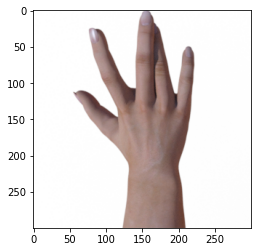

In [11]:
## Visualizing train data
plt.imshow(paper_train[0])

In [12]:
## array of train data 
paper_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

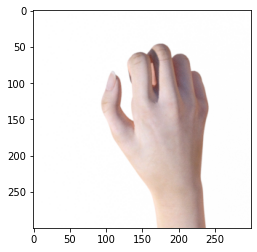

In [13]:
## Visualizing train rock data
plt.imshow(rock_train[0])

In [14]:
## Array of rock train 
rock_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

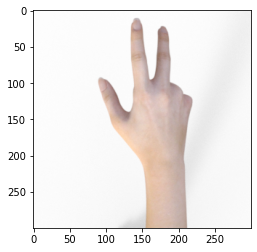

In [15]:
## Visilizing sissor train record
plt.imshow(scissors_train[0])

In [16]:
## Array of sissor train record
scissors_train[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9411765 , 0.9411765 , 0.9411765 ]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.9411765 , 0.9411765 , 0.9411765 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9490196 , 0.9490196 , 0.9490196 ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.9411765 , 0.9411765 , 0.9411765 ],
        [0.94509804, 0.94509804, 0.94509804],
        [0.9372549 , 0.9372549 , 0.9372549 ]],

       ...,

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.9882353 , 0

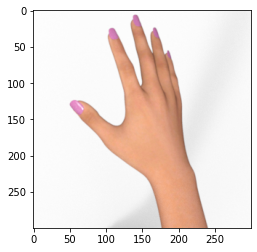

In [17]:
# Visualizing paper test record
plt.imshow(paper_test[0])

In [18]:
# Array of paper test record 
paper_test[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.95686275, 0.95686275, 0.95686275],
        [0.94509804, 0.94509804, 0.94509804]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.9529412 , 0.9529412 , 0.9529412 ],
        [0.9607843 , 0.9607843 , 0.9607843 ],
        [0.94509804, 0.94509804, 0.94509804]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.95686275, 0.95686275, 0.95686275],
        [0.9529412 , 0.9529412 , 0.9529412 ]],

       ...,

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0

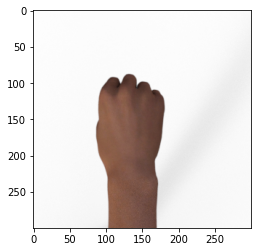

In [19]:
# Visualizing record of test rock 
plt.imshow(rock_test[0])

In [20]:
rock_test[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.96862745, 0.96862745, 0.96862745],
        [0.972549  , 0.972549  , 0.972549  ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.96862745, 0.96862745, 0.96862745]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9843137 , 0.9843137 , 0.9843137 ]],

       ...,

       [[0.98039216, 0.98039216, 0.98039216],
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9843137 , 0

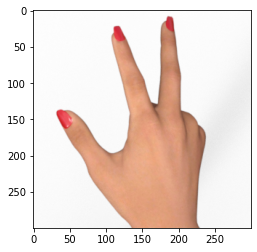

In [21]:
# Visualizing sissor test record
plt.imshow(scissors_test[0])

In [22]:
## Array o sissor test record
scissors_test[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.9843137 , 0.9843137 , 0.9843137 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9843137 , 0.9843137 , 0.9843137 ]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.9843137 , 0.9843137 , 0.9843137 ],
        [0.9843137 , 0.9843137 , 0.9843137 ],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9843137 , 0.9843137 , 0.9843137 ],
        [0.9882353 , 0.9882353 , 0.9882353 ]],

       ...,

       [[0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.98039216, 0

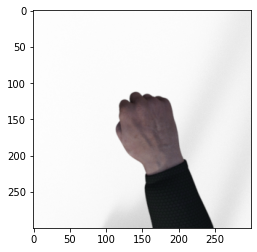

In [23]:
## Visualizinf validation data record
plt.imshow(validation_im[0])

In [24]:
## Convering data to nymoy array with float datatype
paper_train = np.array(paper_train, dtype='float32')
paper_test = np.array(paper_test, dtype='float32')
rock_train = np.array(rock_train, dtype='float32')
rock_test = np.array(rock_test, dtype='float32')
scissors_train = np.array(scissors_train , dtype='float32')
scissors_test = np.array(scissors_test , dtype='float32')
validation_im = np.array(validation_im , dtype='float32')

In [25]:
## COncatenating to train
train1 = np.concatenate((paper_train,rock_train) , axis=0)
train = np.concatenate((train1,scissors_train) , axis=0)

In [26]:
## Concatanintaing to test
test1 = np.concatenate((paper_test,rock_test) , axis=0)
test = np.concatenate((test1,scissors_test) , axis=0)

In [27]:
train.shape

(2520, 300, 300, 3)

In [28]:
test.shape

(372, 300, 300, 3)

In [29]:
y_train=[0]*paper_train.shape[0]+[1]*rock_train.shape[0]+[2]*scissors_train.shape[0]
y_train=np.array(y_train,dtype='float32')

In [30]:
y_test=[0]*paper_test.shape[0]+[1]*rock_test.shape[0]+[2]*scissors_test.shape[0]
y_test=np.array(y_test,dtype='float32')

In [31]:
y_train[:7]

array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
train[0].shape

(300, 300, 3)

### <font color = brown > Convolution Neural Network (Deep Learning)

In [33]:
tf.keras.backend.clear_session()
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300,300,3)), 
    tf.keras.layers.MaxPooling2D(2, 2),                                               
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),                            
    tf.keras.layers.MaxPooling2D(2, 2),                                               
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                           
    tf.keras.layers.MaxPooling2D(2, 2),                                               
    tf.keras.layers.Conv2D(64, (3, 3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),                          
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),                           
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),                                              
    tf.keras.layers.Flatten(),                                                        
    tf.keras.layers.Dropout(0.3),                                                     
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1000, activation = 'relu'),                                   
    tf.keras.layers.Dropout(0.3),                                                    
    tf.keras.layers.Dense(3, activation='softmax')                                    
])

In [34]:
## Summary of model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

#### Model compliling

In [35]:
# compiling model
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
from PIL import Image
image_list = []
for filename in validation_images: #assuming gif
    im=Image.open(filename)
    image_list.append(im)

In [37]:
file_list=os.listdir(r"/content/drive/MyDrive/Colab Notebooks/rock_paper_sissors/rps-validation")
print(file_list)

['rock1.png', 'rock2.png', 'rock3.png', 'paper1.png', 'paper3.png', 'scissors1.png', 'scissors2.png', 'scissors3.png', 'rock4.png', 'rock5.png', 'rock6.png', 'paper4.png', 'paper5.png', 'paper6.png', 'scissors4.png', 'scissors5.png', 'scissors6.png', 'paper7.png', 'paper8.png', 'paper9.png', 'rock7.png', 'rock8.png', 'rock9.png', 'scissors7.png', 'scissors8.png', 'scissors9.png', 'scissors-hires1.png', 'rock-hires1.png', 'paper-hires1.png', 'paper-hires2.png', 'scissors-hires2.png', 'rock-hires2.png', 'paper2.png']


In [38]:
# 0 for paper, 1 for rock and 2 for scissors
validation_test=[]
for i in file_list:
    if i.startswith('p')==True:
        validation_test.append(0)
    elif i.startswith('r')==True:
        validation_test.append(1)
    else:
        validation_test.append(2)

In [39]:
validation_test=np.array(validation_test,dtype='float32')

In [40]:
## Early stopping
from gc import callbacks
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [41]:
training_history = cnn_model.fit(train ,y_train, epochs = 10 , validation_data = (validation_im, validation_test), callbacks = [early_stop])

Epoch 1/10
79/79 [==============================] - 260s 3s/step - loss: 0.6506 - accuracy: 0.6770 - val_loss: 0.4727 - val_accuracy: 0.8788
Epoch 2/10
79/79 [==============================] - 259s 3s/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.3628 - val_accuracy: 0.8788
Epoch 3/10
79/79 [==============================] - 259s 3s/step - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.1958 - val_accuracy: 0.9394
Epoch 4/10
79/79 [==============================] - 263s 3s/step - loss: 0.0367 - accuracy: 0.9921 - val_loss: 0.0643 - val_accuracy: 0.9697
Epoch 5/10
79/79 [==============================] - 264s 3s/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.3290 - val_accuracy: 0.9091
Epoch 6/10
79/79 [==============================] - 263s 3s/step - loss: 1.8248e-04 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 0.9394
Epoch 7/10
79/79 [==============================] - 262s 3s/step - loss: 3.3236e-05 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 0.9394


In [42]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

#### Plotting training and testing accauray and Loss 

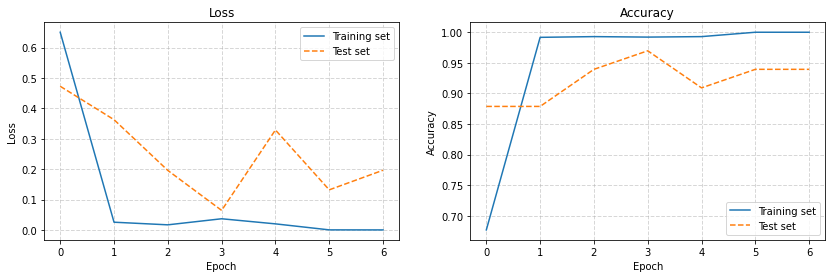

In [43]:
render_training_history(training_history)

<font color = olive > **The Model is having overfitting and we can see the it from the graphs above where atraining accuracy is more and testing accuracy is low so it is clear that the model is overfitting to make it more generalize we can use Image augmentation.**

#### Model Evaluation

In [44]:
cnn_model.evaluate(test,y_test)

12/12 [==============================] - 10s 793ms/step - loss: 0.5831 - accuracy: 0.8871


[0.5831245183944702, 0.8870967626571655]

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [53]:
y_pred=cnn_model.predict(test)
y_predict=[np.argmax(y_pred[i]) for i in range(len(y_pred))]

#### Clissification report

In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       124
         1.0       0.80      0.94      0.87       124
         2.0       0.90      0.96      0.93       124

    accuracy                           0.89       372
   macro avg       0.90      0.89      0.89       372
weighted avg       0.90      0.89      0.89       372



#### CONfuion matrix

In [55]:

cf_matrix=confusion_matrix(y_test,y_predict)
cf_matrix

array([[ 94,  24,   6],
       [  0, 117,   7],
       [  0,   5, 119]])

#### Number of misclasification

In [56]:
count = {}
for i in range(3):    
    a = cf_matrix[i]
    a = np.delete(a, i)
    count[i] = a.sum()
count

{0: 30, 1: 7, 2: 5}

In [57]:
zip(count)

In [59]:
import pandas as pd

In [60]:
eval = pd.DataFrame({'ClassName': count.keys(),
              'no_of_missclass': count.values()})
eval
# 0 for paper, 1 for rock and 2 for scissors

,ClassName,no_of_missclass
0,0,30
1,1,7
2,2,5


<font color = olive > ***There are 30 misclassifation of paper, 7 misclassifcation of rock and 2 misclassification of sissor. Lets apply Image augmentation then see the missclafication of model.***

#### Data AUgmentation

In [61]:
data_augmentation = keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip('horizontal'),
                  layers.experimental.preprocessing.RandomZoom(0.3),
                  layers.experimental.preprocessing.RandomRotation(0.24)])

### <font color = brown > Augmented Layer Model

In [62]:
tf.keras.backend.clear_session()
cnn_model1 = tf.keras.models.Sequential([
                                        data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300,300,3)), 
    tf.keras.layers.MaxPooling2D(2, 2),                                               
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),                            
    tf.keras.layers.MaxPooling2D(2, 2),                                               
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                           
    tf.keras.layers.MaxPooling2D(2, 2),                                               
    tf.keras.layers.Conv2D(64, (3, 3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),                          
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),                           
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),                                              
    tf.keras.layers.Flatten(),                                                        
    tf.keras.layers.Dropout(0.3),                                                     
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1000, activation = 'relu'),                                   
    tf.keras.layers.Dropout(0.3),                                                    
    tf.keras.layers.Dense(3, activation='softmax')                                    
])

In [63]:
cnn_model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [64]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [65]:
training_history = cnn_model1.fit(train ,y_train, epochs = 10,
                                 validation_data = (validation_im, validation_test),
                                 callbacks = [early_stop])

Epoch 1/10
79/79 [==============================] - 298s 4s/step - loss: 1.0932 - accuracy: 0.3710 - val_loss: 0.9399 - val_accuracy: 0.5455
Epoch 2/10
79/79 [==============================] - 291s 4s/step - loss: 0.7955 - accuracy: 0.6321 - val_loss: 1.1576 - val_accuracy: 0.3333
Epoch 3/10
79/79 [==============================] - 292s 4s/step - loss: 0.5200 - accuracy: 0.7940 - val_loss: 0.4145 - val_accuracy: 0.8182
Epoch 4/10
79/79 [==============================] - 291s 4s/step - loss: 0.3836 - accuracy: 0.8520 - val_loss: 0.2622 - val_accuracy: 0.8788
Epoch 5/10
79/79 [==============================] - 294s 4s/step - loss: 0.2737 - accuracy: 0.8944 - val_loss: 0.4671 - val_accuracy: 0.8485
Epoch 6/10
79/79 [==============================] - 294s 4s/step - loss: 0.1935 - accuracy: 0.9274 - val_loss: 0.1174 - val_accuracy: 0.9394
Epoch 7/10
79/79 [==============================] - 293s 4s/step - loss: 0.1377 - accuracy: 0.9476 - val_loss: 0.1353 - val_accuracy: 0.9697
Epoch 8/10
79

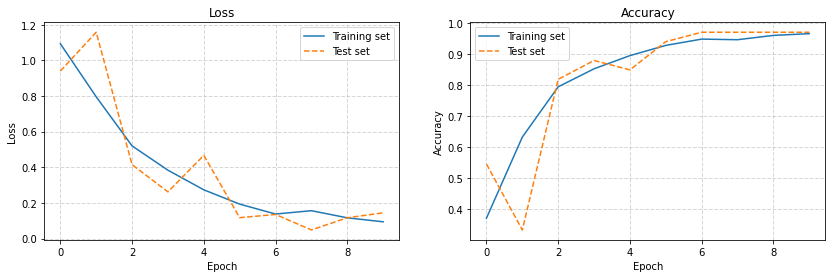

In [66]:
### Plotting Training loss and testing loss and also plotting training accuracy and testing accuracy
render_training_history(training_history)

<font color = olive > **So from the graphs above the model accuracy and loss for both training and test is very colse and accurcy is above 96% so the model is well suited for deployment.** 

In [67]:
cnn_model1.evaluate(test,y_test)

12/12 [==============================] - 18s 2s/step - loss: 0.2189 - accuracy: 0.9328


[0.21890820562839508, 0.9327957034111023]

In [68]:
y_pred1 = cnn_model1.predict(test)
y_predict1 = [np.argmax(y_pred1[i]) for i in range(len(y_pred1))]

#### <font color = brown >CLassification report

In [70]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       124
         1.0       0.92      1.00      0.96       124
         2.0       0.89      0.91      0.90       124

    accuracy                           0.93       372
   macro avg       0.94      0.93      0.93       372
weighted avg       0.94      0.93      0.93       372



####  COnfusion Matrix

In [71]:
cf_matrix = confusion_matrix(y_test, y_predict1)
cf_matrix

array([[110,   0,  14],
       [  0, 124,   0],
       [  0,  11, 113]])

<font color = olive > **So there are only 24 missclassification.**

###  <font color = brown > Number of missclasificcation in each class

In [74]:
count = {}
for i in range(3):    
    a = cf_matrix[i]
    a = np.delete(a, i)
    count[i] = a.sum()
count

zip(count)

eval = pd.DataFrame({'ClassName': count.keys(),
              'no_of_missclass': count.values()})
eval
# 0 for paper, 1 for rock and 2 for scissors

,ClassName,no_of_missclass
0,0,14
1,1,0
2,2,11


<font color = olive > ***So there ar no misclafications for rock, 14 misclassification for paper and 11 misclasification for sissors. We can use this model.***
 - NOTE : We can further increase model accuracy by applyting more epoch but due to system overload we haven't done that here. 

# <font color = purple> **Conslusion :**
 <font color = purple>  So by using Image Classifcation and Image Augmentation we made model which can classify hand gestures into rock, paper, scissor.